In [1]:
import numpy as np
import os, time
import matplotlib.pyplot as plt
import galactic_wavelets as gw
import torch

In [2]:
N = 128
quijote_dir = '/mnt/ceph/users/fvillaescusa/Quijote/3D_cubes/'
test_df = quijote_dir+f'fiducial/0/df_m_{N}_CIC_z=0.npy'

device = 0

In [3]:
df = torch.from_numpy(np.load(os.path.join(quijote_dir, test_df))).to(device)
df_shape = df.shape
N = df_shape[0]
print("Shape of the density field: ", df_shape)
print("Min/max/mean of the density field: ", df.min(), df.max(), df.mean())

Shape of the density field:  torch.Size([128, 128, 128])
Min/max/mean of the density field:  tensor(-0.9404, device='cuda:0') tensor(56.0308, device='cuda:0') tensor(-3.4925e-10, device='cuda:0')


In [4]:
J = 5
Q = 1
kc = np.pi
erosion_threshold = 0.1

In [5]:
wst_op_full = gw.ScatteringOp(df_shape, J, Q,
                              kc=kc,
                              device=device)
wst_op_half = gw.ScatteringOp(tuple([x//2 for x in df_shape]), J, Q,
                              kc=kc,
                              erosion_threshold=erosion_threshold,
                              device=device)

Computing wavelets...
Done!
Computing wavelets...
Done!
Computing masks for the wavelet transform...
Done!


In [6]:
w_full = torch.fft.fftshift(wst_op_full.wt_op.get_wavelets("physical").squeeze(), dim=(-3, -2, -1))
w_half = torch.fft.fftshift(wst_op_half.wt_op.get_wavelets("physical").squeeze(), dim=(-3, -2, -1))
for j in range(J):
    for q in range(Q):
        w_full[j*Q + q] *= 2**(3*(j*Q + q)/Q)
        w_half[j*Q + q] *= 2**(3*(j*Q + q)/Q)

/tmp/ipykernel_492587/3540816991.py:13: RuntimeWarning: invalid value encountered in divide
  axs[3, j].imshow((awf-awh)/awf, cmap='seismic', vmin=-1, vmax=1)
/tmp/ipykernel_492587/3540816991.py:14: RuntimeWarning: invalid value encountered in divide
  print("Absolute max diff and relative max diff: ", np.abs(awf-awh).max(), np.nanmax(np.abs((awf-awh)/awf)), np.abs(wf - wh).max(), np.nanmax(np.abs((wf-wh)/wf)))


Absolute max diff and relative max diff:  1.6065314e-08 49.112732 1.7796431e-08 49.730602
Absolute max diff and relative max diff:  6.63443e-08 19.669353 8.6099035e-08 21.221508
Absolute max diff and relative max diff:  1.2081253e-07 197.4253 1.4325732e-07 198.43852
Absolute max diff and relative max diff:  2.3841858e-07 44.823284 2.592612e-07 45.61227
Absolute max diff and relative max diff:  3.5762787e-07 0.000320426 3.5779624e-07 0.0004974336


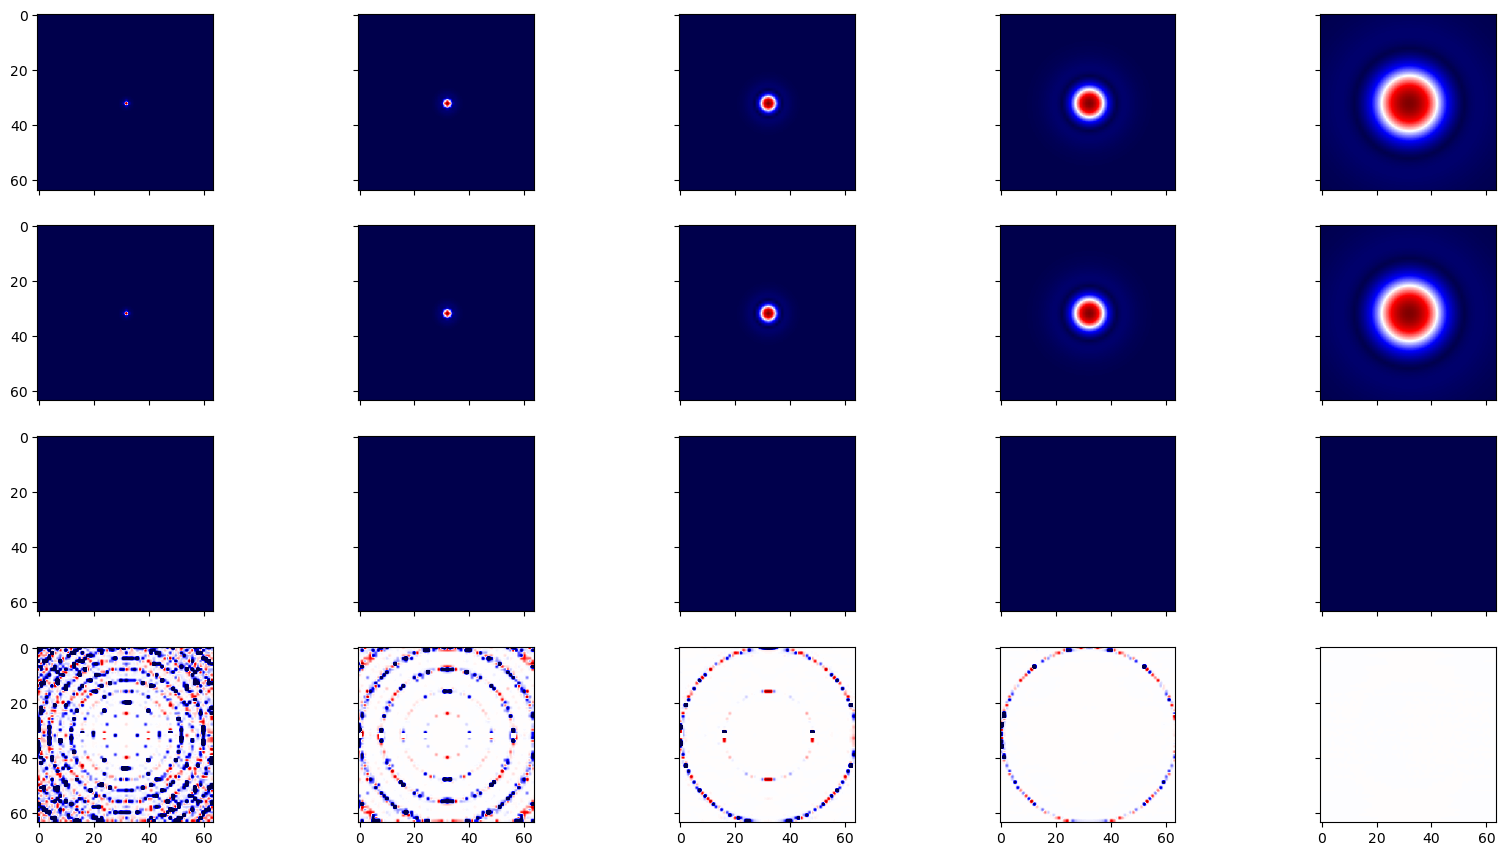

In [9]:
vmin = min(torch.abs(w_full).min(), torch.abs(w_half).min())
vmax = max(torch.abs(w_full).max(), torch.abs(w_half).max())

fig, axs = plt.subplots(4, J*Q, figsize=(4*J*Q, 10.5), sharex=True, sharey=True)
for j in range(J*Q):
    wf = w_full[j].cpu().numpy()[N//2, N//4:3*N//4, N//4:3*N//4]
    wh = w_half[j].cpu().numpy()[N//4]
    awf = np.abs(wf)
    awh = np.abs(wh)
    axs[0, j].imshow(awf, cmap='seismic', vmin=vmin, vmax=vmax)
    axs[1, j].imshow(awh, cmap='seismic', vmin=vmin, vmax=vmax)
    axs[2, j].imshow(awf-awh, cmap='seismic', vmin=vmin, vmax=vmax)
    axs[3, j].imshow((awf-awh)/awf, cmap='seismic', vmin=-1, vmax=1)
    print("Absolute max diff and relative max diff: ", np.abs(awf-awh).max(), np.nanmax(np.abs((awf-awh)/awf)), np.abs(wf - wh).max(), np.nanmax(np.abs((wf-wh)/wf)))

In [11]:
awf.shape

(64, 64)

In [12]:
(awf-awh)/awf

array([[-1.5505790e-06, -1.3156756e-06, -1.5857281e-06, ...,
        -1.1852852e-06, -1.5857278e-06, -1.5130267e-06],
       [-1.8419458e-06, -2.0291004e-06, -1.4683087e-06, ...,
        -1.3762285e-06, -1.7619703e-06, -1.5781889e-06],
       [-3.3979879e-06, -3.1323923e-06, -2.8263858e-06, ...,
        -2.2727972e-06, -2.6550890e-06, -3.1323916e-06],
       ...,
       [-7.2104926e-06, -6.5370900e-06, -5.9092790e-06, ...,
        -5.0546905e-06, -5.7577581e-06, -6.6231037e-06],
       [-7.9286310e-06, -6.8521026e-06, -6.7661927e-06, ...,
        -5.9092708e-06, -6.6805437e-06, -6.8521017e-06],
       [-6.9730868e-06, -6.3127613e-06, -5.3838021e-06, ...,
        -4.6447735e-06, -5.2859132e-06, -6.4254882e-06]], dtype=float32)